In [1]:
from itertools import product

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats
import statsmodels.api as sm

### Глава 8
#### Анализ зависимостей

##### УРАВНЕНИЕ РЕГРЕССИИ

x - независимая переменная, y - зависимая переменная.  Набор значений у, соответствующих определенному значению х, обозначается у|х. $\mu_{y|x}$ - среднее y в точке х.

$\mu_{y|x}=\alpha+\beta x$ - формулся для прямой средних.

для применения методов регрессий необходимо:

* Среднее значение $\mu_{y|x}$ линейно зависит от х.
* Для любого значения х значения у|х распределены нормально.
* Стандартное отклонение $\sigma_{y|x}$ одинаково при всех значениях х.

##### ОЦЕНКА ПАРАМЕТРОВ УРАВНЕНИЯ РЕГРЕСИИ ПО ВЫБОРКЕ

**Метод наименьших квадратов**

$\hat{y}=a+bx$

$a=\cfrac{\sum{Y}\sum{X^2}-\sum{X}\sum{XY}}{n\sum{X^2}-(\sum{Y})^2}$

$b=\cfrac{n\sum{XY}-\sum{X}\sum{Y}}{n\sum{X^2}-(\sum{Y})^2}$

где X и Y — значения независимой и зависимой переменных у n членов выборки.

$S_{y|x} = \sqrt{\cfrac{\sum(Y-(a+bX))^2}{n-2}}$ - остаточное стандартное отклонение.

$S_{y|x}=\sqrt{\cfrac{n-1}{n-2}(S_Y^2-b^2 S_X^2)}$ - Связь $S_{y|x}$ со стандартными отклонениями $S_{y}$ и $S_{x}$ зависимой и независимой переменных.

**Стандартные ошибки коэффициентов регрессии**

$S_a=S_{y|x}\sqrt{\cfrac{1}{n}+\cfrac{\overline{X}^2}{(n-1)S_X^2}}$

$S_b=\cfrac{1}{\sqrt{n-1}}\cfrac{S_{y|x}}{S_X}$

**Есть ли зависимость?**

!!! Речь идет исключительно о линейной зависимости.

* Вариант 1

Критерий стьюдента: 
$t=\cfrac{Выборочная оценка - Истинная величина}{Стандартная ошибка выборочной оценки}=\cfrac{b-\beta}{S_b}$

Нулевая гипотеза верна если наклон равен нулю, т.е. $\beta=0$ => $t=\cfrac{b}{S_b}$. t сравнивается с критическим значением $t_\alpha$ для выбранного уровня значимости $\alpha$ и числа степеней свободы $ν = n – 2$. Если $t > t_\alpha$, то $P<\alpha$, т.е. зависимость статистически значима.

* Вариант 2

На основе доверительных интервалов.

$b - t_\alpha S_b < \beta < b + t_\alpha S_b$ - попадает ли ноль, в полученный интервал.

**Доверительная область для линии регрессии**

Стандартная ошибка регрессии: $S_{\hat{y}}=S_{y|x}\sqrt{\cfrac{1}{n}+\cfrac{(x-\overline{X})^2}{(n-1)S_X^2}}$

доверительный интервал для значения уравнения регрессии в точке х: $\hat{y} - t_\alpha S_{\hat{y}} < y <\hat{y} - t_\alpha S_{\hat{y}}$, где $t_\alpha$ — критическое значение с $ν = n – 2$ степенями свободы, а $\hat{y} = a + b x$ — значение уравнения регрессии в точке х. Т.о. получается уравнение для кривых, ограничивающих доверительную область линии регрессии.

**Доверительная область для значений**

Разброс значений складывается из разброса значений вокруг линии регресии и неопределенности положения самой этой линии. Характеристикой разброса значений вокруг линии регрессии
является остаточное стандартное отклонение $S_{y|x}$, а неопределенности положения линии регрессии — стандартная ошибка регрессии $S_{\hat{y}}$ . Дисперсия суммы двух величин равна сумме дисперсий, поэтому:

$S_Y=\sqrt{S_{y|x}^2+S_{\hat{y}^2}}=S_{y|x}\sqrt{1 + \cfrac{1}{n} + \cfrac{(x-\overline{X})^2}{(n-1)S_X^2}}$

Тогда доверительный интервал для зависимой переменной: $\hat{y} - t_\alpha S_Y < y <\hat{y} - t_\alpha S_Y$

##### СРАВНЕНИЕ ДВУХ ЛИНИЙ РЕГРЕССИИ

Часто требуется сравнить линии регрессии, рассчитанные по двум выборкам. Это можно сделать тремя способами.
1. Сравнить коэффициенты наклона b

$t=\cfrac{b_1-b_2}{S_{b_1-b_2}}$, где $S_{b_1-b_2}$ - стандартная ошибка разности коэффициентов наклона.

Сравнивается с критическим значением $t_\alpha$ c $n_1+n_2-4$ степенями свободы.

$S_{b_1-b_2}=\sqrt{\cfrac{S_{y|x_{общ}}^{2}}{(n_1-1)S_{x_1}^{2}}+\cfrac{S_{y|x_{общ}}^{2}}{(n_2-1)S_{x_2}^{2}}}$, где $S_{y|x_{общ}}^{2} = \cfrac{(n_1-2)S_{y|x_1}^{2}+(n_2-2)S_{y|x_2}^{2}}{n_1+n_2-4}$

Если обе регрессии оценены по одинаковому числу наблюдений, то стандартная ошибка разности: $S_{b_1-b_2}=\sqrt{S_{b_1}^2+S_{b_2}^2}$

2. Сравнить коэффициенты сдвига a

*Точно так же как и с кэффициентами b*

3. Сравнить линии в целом

Сравнить две линии регрессии — значит оценить вероятность нулевой гипотезы о совпадении линий.

Для этого объединяеются обе выборки в одну и для неё строится линия регрессии. Если линии регрессии для двух выборок близки, остаточная дисперсия ($S_{y|x}^2$) при этом существенно не изменится.

И наоборот, если они различаются, то совпадение точек и линии ухудшится и остаточная дисперсия возрастет. Порядок действий таков:

* Построить прямую регресии для каждой из выборок.
* По остаточным дисперсиям каждой из регрессий ($S_{y|x_1}^{2}$ и $S_{y|x_2}^{2}$) вычислить объединенную оценку остаточной дисперсии ($S_{y|x_{общ}}^{2}$).
* Объединить обе выборки. Построить прямую регрессии для получившейся выборки и вычислить остаточную дисперсию ($S_{y|x_{един}}^{2}$)
* Вычислить «выигрыш» от использования двух раздельных регрессий. Мерой выигрыша служит величина:

$S_{y|x_{в}}^{2} = \cfrac{(n_1+n_2-2)S_{y|x_{един}}^{2}-(n_1+n_2-4)S_{y|x_{общ}}^{2}}{2}$
* по $S_{y|x_{в}}^{2}$ и $S_{y|x_{общ}}^{2}$ вычислить критерий F: $F = \cfrac{S_{y|x_{в}}^{2}}{S_{y|x_{общ}}^{2}}$
* Сравнить вычисленное значение с критическим значением F для числа степеней свободы $\nu_{меж} = 2$ и $ν_{вну} = n_1 + n_2 – 4$. Если полученное значение больше критического, то гипотеза о совпадении линий регрессии должна быть отклонена.

##### КОРРЕЛЯЦИЯ

**Коэффициент корреляции Пирсона**
Предназначен для описания линейной связи количественных признаков (требует нормальности распределения).

*Зачем? Почему не достаточно регрессионного анализа, а в качестве меры тесноты использовать остаточное стандартное отклонение?* - Если поменять местами зависимую и независимую
переменные, то остаточное стандартное отклонение, как и другие показатели регрессионного анализа, будет иным (линии регрессии тоже будут разными!!!). Асимметричность регрессионного анализа — вот что мешает непосредственно использовать его для характеристики силы связи. Коэффициент корреляции, хотя его идея вытекает из регрессионного анализа, свободен от этого недостатка.

$r=\cfrac{\sum{(X-\overline{X})(Y-\overline{Y})}}{\sqrt{\sum{(X-\overline{X})^2}\sum{(Y-\overline{Y})^2}}}$ - коэффициент корреляции.

Коэффициент корреляции принимает значения от –1 до +1. Чем теснее связь, тем больше абсолютная величина коэффициента корреляции. Знак показывает направление связи. При r > 0 говорят о прямой корреляции (с увеличением одной переменной другая также возрастает), при r < 0 — об обратной (с увеличением одной переменной другая уменьшается).

**Связь регрессии и корреляции**

Уравнение регрессии строится так, чтобы минимизировать сумму квадратов отклонений от линии регрессии. $S_{ост}$ - остаточная сумма квадратов.

Сумму квадратов отклонений значений зависимой переменной Y от ее среднего обозначается $S_{общ}$. Тогда: $r^2 = 1+\cfrac{S_{ост}}{S_{общ}}$ - коэффициент детерминации (это просто квадрат коэффициента корреляции). 

Коэффициент детерминации показывает силу связи, но не ее направленность. Если значения зависимой переменной лежат на прямой регрессии, то $S_{ост} = 0$, и тем самым r = +1 или r = –1, то есть существует линейная связь зависимой и независимой переменной. По любому значению независимой переменной можно совершенно точно предсказать значение зависимой переменной. Напротив, если переменные вообще не связаны между собой, то $S_{ост} = S_{общ}$. Тогда r = 0.

Видно также, что коэффициент детерминации равен той доле общей дисперсии $S_{общ}$, которая обусловлена или, как говорят, объясняется линейной регрессией. 

Остаточная сумма квадратов $S_{ост}$ связана с остаточной дисперсией $S_{y|x}^{2}$ соотношением $S_{ост} = (n – 2)S_{y|x}^{2}$, а общая сумма квадратов $S_{общ}$ с дисперсией $S_{y}^{2}$ соотношением $S_{общ}=(n-1)S_{y}^{2}$. В таком случае 

$r^2 = 1-\cfrac{n-2}{n-1}\cfrac{S_{y|x}^{2}}{S_{y}^{2}}$

!!! Коэффициент корреляции отражает тесноту линейной связи переменных. Однако если речь идет о предсказании значения одной переменной по значению другой, на коэффициент корреляции не следует слишком полагаться. Поэтому даже при большом коэффициенте корреляции обязательно нужно вычислять доверительную область значений.

**Статистическая значимость корреляции**

Соотношение коэффициента корреляции и коэффициента наклона прямой регрессии b: $r = b\cfrac{S_X}{S_Y}$, где b — коэффициент наклона прямой регрессии, $S_X$ и $S_Y$ — стандартные отклонения переменных.

Поскольку из b = 0 следует r = 0, гипотеза об отсутствии корреляции равнозначна гипотезе о нулевом наклоне прямой регрессии. Поэтому для оценки статистической значимости корреляции можно воспользоваться формулой для оценки статистической значимости отличия b от нуля:

$t=\cfrac{b}{S_b}$, $\nu=n-2$

или $t=\cfrac{r}{\sqrt{\cfrac{1-r^2}{n-2}}}$, $\nu=n-2$

Формулы тождественны хотя вывод не быстр.

**Коэффициентранговой корреляции Спирмена**
Можно использовать, когда связь нелинейна (не всегда "U" образную кривую нельзя) — и не только для количественных, но и для порядковых признаков. Это непараметрический метод, он не требует какого-либо определенного типа распределения. Обозначается $r_s$

Идея проста:  Нужно упорядочить данные по возрастанию и заменить реальные значения их рангами. Затем, беря вместо самих значений их ранги, рассчитывают обычный коэффициент корреляции Пирсона. Это и будет коэффициент ранговой корреляции Спирмена. Его можно рассчитать и проще:

$r_s = 1 - \cfrac{6\sum{d^2}}{n^3-n}$, где d — разность рангов для каждого члена выборки

Как быть, если в ряду встретятся одинаковые значения? Им следует присвоить один и тот же ранг, равный среднему занимаемых ими мест.

Уровень значимости коэффициента корреляции Спирмена для n < 50, можно найти в таблицах, а при n > 50 нужно воспользоваться критерием Стьюдента: $t=\cfrac{r_s}{\sqrt{\cfrac{1-r_s^2}{n-2}}}$, $\nu=n-2$

##### ЧУВСТВИТЕЛЬНОСТЬ КОЭФФИЦИЕНТА КОРРЕЛЯЦИИ

Величина $Z=\cfrac{1}{2}ln(\cfrac{1+r}{1-r})$ имеет нормальное распределение со стандартным отклонением $\sigma_Z=\sqrt{\cfrac{1}{n-3}}$.

Поэтому величина $z=\cfrac{Z}{\sigma_Z}$ в отсутствие корреляции имеет стандартное нормальное распределение со средним, равным нулю.

Можно показать, что чувствительность $1 – \beta$, необходимая для обнаружения корреляции, не меньшей $\rho$, при уровне значимости $\alpha$ и при объеме выборки n равна площади под кривой стандартного нормального распределения правее точки: $z_{1-\beta}=z_{\alpha}-\cfrac{Z_{\rho}}{\sqrt{\cfrac{1}{n-3}}}$ (формула для нахождения чувствительности по известному объему выборки)

Если нужно найти объем выборки, при котором достигалась бы чувствительность $1 – \rho$, то, разрешив это уравнение относительно n, получим: $n=(\cfrac{z_{\alpha}-z_{1-\beta}}{Z_{\rho}})^2+3$

##### СРАВНЕНИЕ ДВУХ СПОСОБОВ ИЗМЕРЕНИЯ: МЕТОД БЛЭНДА—АЛТМАНА

Пусть с помощью двух методов получены две серии измерений. Казалось бы, ничто не мешает применить регрессионный анализ или рассчитать коэффициент корреляции. Однако регрессионный анализ неприменим уже потому, что его результаты зависят от того, какую переменную считать независимой, а какую зависимой (т.к. сравнивается не с эталоном).

Идея метода (описательный метод оценки согласованности измерений): Для каждой — выполненной одним и другим способами — пары измерений вычисляется их разность. Находится средняя величина и стандартное отклонение разности. Средняя разность характеризует систематическое расхождение, а стандартное отклонение — степень разброса результатов. Далее, если в качестве оценки измеряемого признака взять среднее значение пары измерений, то можно определить, зависит ли расхождение от величины признака.

### ЗАДАЧИ

**8.1.** 

Постройте графики для приведенных наборов данных. Найдите линии регрессии и коэффициенты корреляции. Нанесите данные и прямые регрессии на графики. Что в этих
трех случаях общего, в чем различия?

1. 

X|Y
-|-
30|37
30|47
40|50
40|60

2. 

X|Y
-|-
30|37
30|47
40|50
40|60
20|25
20|35
50|62
50|72

3. 

X|Y
-|-
30|37
30|47
40|50
40|60
20|25
20|35
50|62
50|72
10|13
10|23
60|74
60|84

In [2]:
x1 = np.array([30, 30, 40, 40])
y1 = np.array([37, 47, 50, 60])

x2 = np.array([30, 30, 40, 40, 20, 20, 50, 50])
y2 = np.array([37, 47, 50, 60, 25, 35, 62, 72])

x3 = np.array([30, 30, 40, 40, 20, 20, 50, 50, 10, 10, 60, 60])
y3 = np.array([37, 47, 50, 60, 25, 35, 62, 72, 13, 23, 74, 84])

xmin, xmax = 10, 60

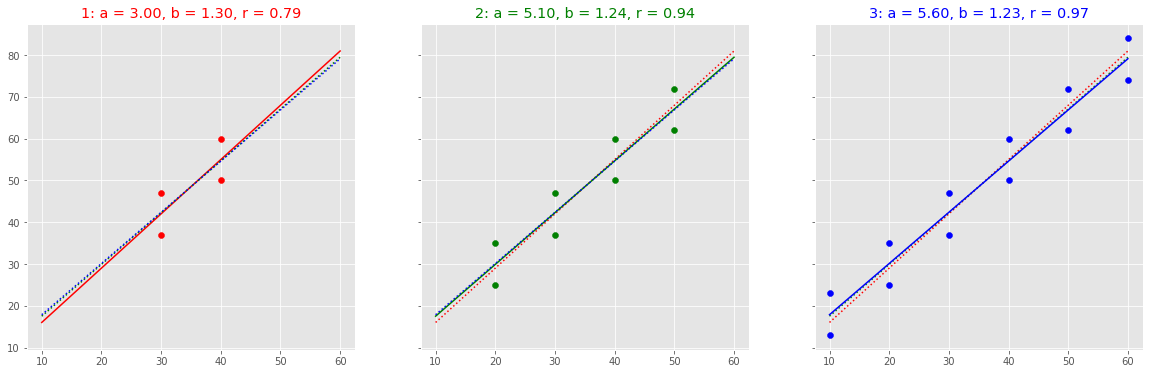

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)
c = ["red", "green", "blue"]

for i, (x, y) in enumerate([(x1, y1), (x2, y2), (x3, y3)]):
    reg = LinearRegression().fit(x.reshape(-1,1), y)
    a, b, r = reg.intercept_, reg.coef_[0], np.corrcoef(x, y)[0, 1]

    # print(f"{i+1}: a = {a:.2f}, b = {b:.2f}, r = {r:.2f}")

    axs[i].scatter(x, y, c=c[i])
    axs[i].set_title(f"{i+1}: a = {a:.2f}, b = {b:.2f}, r = {r:.2f}", c=c[i])
    
    # чтоб визуально показать различия в наклоне
    for j in range(3):
        axs[j].plot([xmin, xmax], np.array([xmin, xmax])*b + a, c=c[i], linestyle=":" if i!=j else "-")

С увеличением диапазона данных растет и коэффициент корреляции.

**8.2.**
Постройте графики для двух наборов данных. Найдите для каждого линию регрессии и коэффициент корреляции.

1. 
X|Y
-|-
15|19
15|29
20|25
20|35
25|31
25|41
30|37
30|47
60|40
2. 
X|Y
-|-
20|21
20|31
30|18
30|28
40|15
40|25
40|75
40|85
50|65
50|75
60|55
60|65

Нанесите полученные прямые регрессии на графики с исходными данными. Обсудите результаты.

In [4]:
x1 = np.array([15, 15, 20, 20, 25, 25, 30, 30, 60])
y1 = np.array([19, 29, 25, 35, 31, 41, 37, 47, 40])

x2 = np.array([20, 20, 30, 30, 40, 40, 40, 40, 50, 50, 60, 60])
y2 = np.array([21, 31, 18, 28, 15, 25, 75, 85, 65, 75, 55, 65])

xmin, xmax = 15, 60

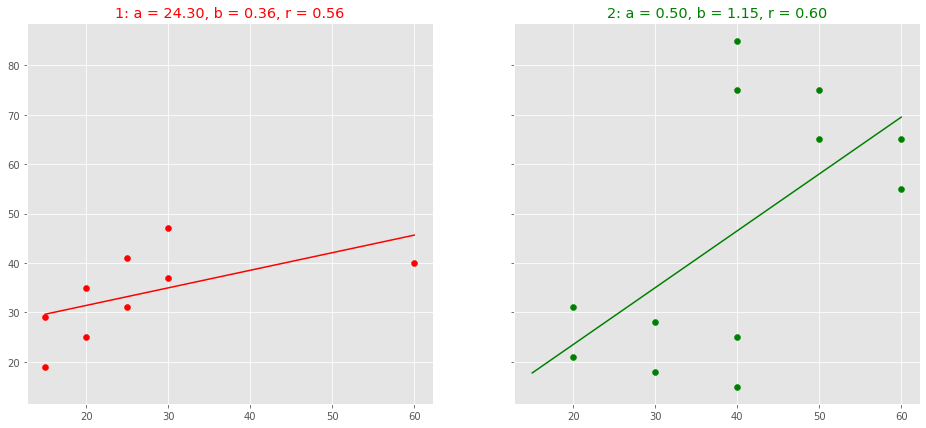

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7), sharex=True, sharey=True)
c = ["red", "green", "blue"]

for i, (x, y) in enumerate([(x1, y1), (x2, y2)]):
    reg = LinearRegression().fit(x.reshape(-1,1), y)
    a, b, r = reg.intercept_, reg.coef_[0], np.corrcoef(x, y)[0, 1]

    # print(f"{i+1}: a = {a:.2f}, b = {b:.2f}, r = {r:.2f}")

    axs[i].scatter(x, y, c=c[i])
    axs[i].plot([xmin, xmax], np.array([xmin, xmax])*b + a, c=c[i])

    axs[i].set_title(f"{i+1}: a = {a:.2f}, b = {b:.2f}, r = {r:.2f}", c=c[i])

* Первый пример показывает, сколь большое влияние может иметь единственная точка.
* Второй пример показывает, как важно нанести данные на график, прежде чем приступить в регрессионному анализу: здесь выборка явно разнородна и может быть описана двумя различными зависимостями.

Условия применимости регрессионного анализа не соблюдены, и попытка выразить связь единственной линией регрессии несостоятельна.

**8.3.** 

В таблице представлены результаты четырех экспериментов. Вычислите для каждого эксперимента коэффициенты линейной регрессии и коэффициент корреляции. В чем сходство и различие результатов экспериментов? Проверьте, выполняются ли условия применимости регрессионного анализа.

X1|Y1|X2|Y2|X3|Y3|X4|Y4
-|-|-|-|-|-|-|-|
10|8.04|10|9.14|10|7.46|8|6.58
8|6.95|8|8.14|8|6.77|8|5.76
13|7.58|13|8.74|13|12.74|8|7.71
9|8.81|9|8.77|9|7.11|8|8.84
11|8.33|11|9.26|11|7.81|8|8.47
14|9.96|14|8.10|14|8.84|8|7.04
6|7.24|6|6.13|6|6.08|8|5.25
4|4.26|4|3.10|4|5.39|19|12.50
12|10.84|12|9.13|12|8.15|8|5.56
7|4.82|7|7.26|7|6.42|8|7.91
5|5.68|5|4.74|5|5.73|8|6.89

In [6]:
df = pd.DataFrame(data=[[10,8.04,10,9.14,10,7.46,8,6.58],
                        [8,6.95,8,8.14,8,6.77,8,5.76],
                        [13,7.58,13,8.74,13,12.74,8,7.71],
                        [9,8.81,9,8.77,9,7.11,8,8.84],
                        [11,8.33,11,9.26,11,7.81,8,8.47],
                        [14,9.96,14,8.10,14,8.84,8,7.04],
                        [6,7.24,6,6.13,6,6.08,8,5.25],
                        [4,4.26,4,3.10,4,5.39,19,12.50],
                        [12,10.84,12,9.13,12,8.15,8,5.56],
                        [7,4.82,7,7.26,7,6.42,8,7.91],
                        [5,5.68,5,4.74,5,5.73,8,6.89]],
                  columns=pd.MultiIndex.from_tuples(product([f"Эксперимент {x}" for x in "АБВГ"], "XY")))
xmin, xmax = df.iloc[:,::2].min(), df.iloc[:,::2].max()
display(df)

Эксперимент А        Эксперимент Б       Эксперимент В         \
               X      Y             X     Y             X      Y   
0             10   8.04            10  9.14            10   7.46   
1              8   6.95             8  8.14             8   6.77   
2             13   7.58            13  8.74            13  12.74   
3              9   8.81             9  8.77             9   7.11   
4             11   8.33            11  9.26            11   7.81   
5             14   9.96            14  8.10            14   8.84   
6              6   7.24             6  6.13             6   6.08   
7              4   4.26             4  3.10             4   5.39   
8             12  10.84            12  9.13            12   8.15   
9              7   4.82             7  7.26             7   6.42   
10             5   5.68             5  4.74             5   5.73   

   Эксперимент Г         
               X      Y  
0              8   6.58  
1              8   5.76  
2              8   7.71  
3              8   8.84  
4              8   8.47  
5              8   7.04  
6              8   5.25  
7             19  12.50  
8              8   5.56  
9              8   7.91  
10             8   6.89

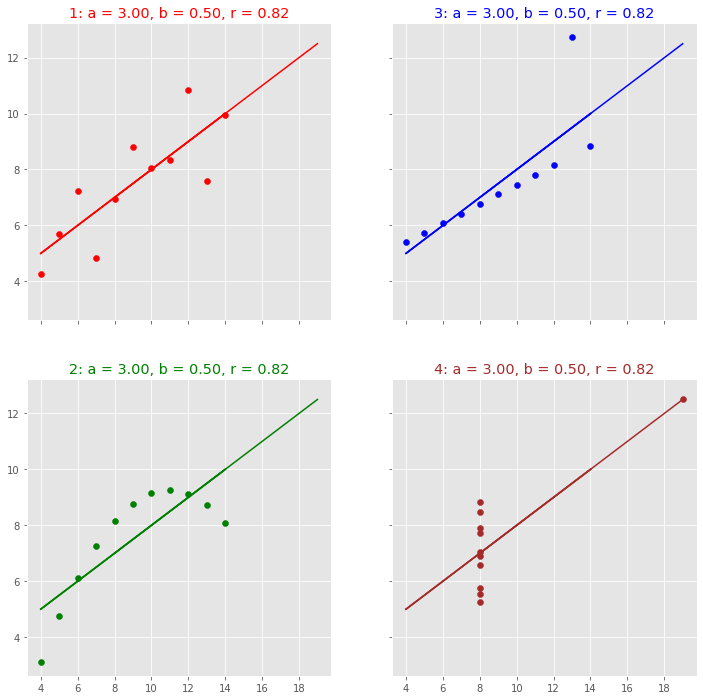

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharex=True, sharey=True)
c = ["red", "green", "blue", "brown"]

for i, exp in enumerate("АБВГ"):
    x = df[f"Эксперимент {exp}"]["X"].values
    y = df[f"Эксперимент {exp}"]["Y"].values
    reg = LinearRegression().fit(x.reshape(-1,1), y)  # type: ignore
    a, b, r = reg.intercept_, reg.coef_[0], np.corrcoef(x, y)[0, 1]

    # print(f"{i+1}: a = {a:.2f}, b = {b:.2f}, r = {r:.2f}")

    axs[i%2][i//2].scatter(x, y, c=c[i])
    axs[i%2][i//2].plot([xmin, xmax], np.array([xmin, xmax])*b + a, c=c[i])

    axs[i%2][i//2].set_title(f"{i+1}: a = {a:.2f}, b = {b:.2f}, r = {r:.2f}", c=c[i])

Во всех четырех экспериментах а = 3,0; b = 0,5; r = 0,82.
Условия применимости регрессионного анализа соблюдены только в первом эксперименте.

**8.4.**

Исследуя проницаемость сосудов сетчатки, Дж. Фишман и соавт. (G. A. Fishman et al. Blood-retinal barrier function in patients with cone or cone-rod dystrophy. Arch. Ophthalmoi, 104:545—548, 1986) решили выяснить, связан ли этот показатель с электрической активностью сетчатки. Позволяют ли полученные данные говорить о существовании связи?

Проницаемость сосудов сетчатки|Электрическая активность сетчатки
-|-
19.5|0.0
15.0|38.5
13.5|59.0
23.3|97.4
6.3|119.2
2.5|129.5
13.0|198.7
1.8|248.7
6.5|318.0
1.8|438.5

In [8]:
df = pd.DataFrame(data=[[19.5,0.0],
                        [15.0,38.5],
                        [13.5,59.0],
                        [23.3,97.4],
                        [6.3,119.2],
                        [2.5,129.5],
                        [13.0,198.7],
                        [1.8,248.7],
                        [6.5,318.0],
                        [1.8,438.5]],
                  columns=["Проницаемость сосудов сетчатки", "Электрическая активность сетчатки"])

display(df)

,Проницаемость сосудов сетчатки,Электрическая активность сетчатки
0,19.5,0.0
1,15.0,38.5
2,13.5,59.0
3,23.3,97.4
4,6.3,119.2
5,2.5,129.5
6,13.0,198.7
7,1.8,248.7
8,6.5,318.0
9,1.8,438.5


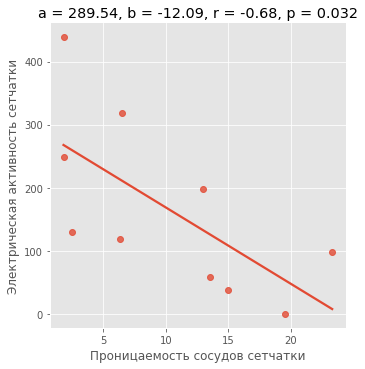

In [9]:
sns.lmplot(x="Проницаемость сосудов сетчатки", y="Электрическая активность сетчатки", data=df, ci=None);
ax = plt.gca()

x = df["Проницаемость сосудов сетчатки"].values
y = df["Электрическая активность сетчатки"].values

reg = LinearRegression().fit(x.reshape(-1,1), y)  # type: ignore
a, b = reg.intercept_, reg.coef_[0]
r, p = scipy.stats.pearsonr(x, y)

ax.set_title(f"a = {a:.2f}, b = {b:.2f}, r = {r:.2f}, p = {p:.3f}");

Да, т.к. P = 0.032 < 0.05

**8.5.**

Наиболее точную оценку объема левого желудочка дает рентгеноконтрастная вентрикулография — метод, требующий катетеризации сердца, а потому дорогой и небезопасный. Продолжается поиск методов, не требующих катетеризации. Р. Слуцкий и соавт. (R. Slutsky et al. Left ventricular volumes by gated equilibriumradionuclide angiography method. Circulation, 60:556—564, 1979) исследовали метод оценкиобъема левогожелудочка по данным изотопной вентрикулографии с внутривенным введением изотопа.
* Конечно-диастолический объем

Изотопная вентрикулография|Рентгеноконтрастная вентрикулография
-|-
75|101
48|75
126|126
93|106
201|195
260|265
40|60
293|288
95|94
58|67
91|81
182|168
91|89
88|102
161|150
118|94
120|129
* Конечно-систолический объем

Изотопная вентрикулография|Рентгеноконтрастная вентрикулография
-|-
35|47
30|35
52|49
23|23
103|88
182|173
14|12
166|163
27|29
24|25
50|25
139|131
50|49
40|44
57|60
41|18
48|40

In [10]:
df = pd.DataFrame(data=[[75, 101, 35, 47],[48, 75, 30, 35],[126, 126, 52, 49],[93, 106, 23, 23],[201, 195, 103, 88],
                        [260, 265, 182, 173],[40, 60, 14, 12],[293, 288, 166, 163],[95, 94, 27, 29],[58, 67, 24, 25],
                        [91, 81, 50, 25],[182, 168, 139, 131],[91, 89, 50, 49],[88, 102, 40, 44],[161, 150, 57, 60],
                        [118, 94, 41, 18],[120, 129, 48, 40]],
                  columns=pd.MultiIndex.from_tuples(product(["Конечно-диастолический объем", "Конечно-систолический объем"],
                                                            ["Изотопная вентрикулография", "Рентгеноконтрастная вентрикулография"]))
                  )

display(df)

Конечно-диастолический объем                                       \
     Изотопная вентрикулография Рентгеноконтрастная вентрикулография   
0                            75                                  101   
1                            48                                   75   
2                           126                                  126   
3                            93                                  106   
4                           201                                  195   
5                           260                                  265   
6                            40                                   60   
7                           293                                  288   
8                            95                                   94   
9                            58                                   67   
10                           91                                   81   
11                          182                                  168   
12                           91                                   89   
13                           88                                  102   
14                          161                                  150   
15                          118                                   94   
16                          120                                  129   

   Конечно-систолический объем                                       
    Изотопная вентрикулография Рентгеноконтрастная вентрикулография  
0                           35                                   47  
1                           30                                   35  
2                           52                                   49  
3                           23                                   23  
4                          103                                   88  
5                          182                                  173  
6                           14                                   12  
7                          166                                  163  
8                           27                                   29  
9                           24                                   25  
10                          50                                   25  
11                         139                                  131  
12                          50                                   49  
13                          40                                   44  
14                          57                                   60  
15                          41                                   18  
16                          48                                   40

Конечно-диастолический объем: a = 15.01, b = 0.90, r = -0.68, p = 0.032
Конечно-систолический объем: a = -0.87, b = 0.95, r = -0.68, p = 0.032


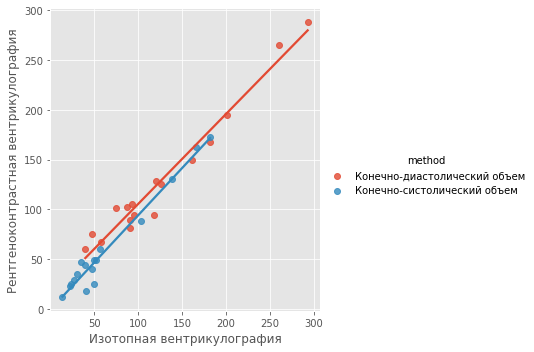

In [11]:
sns.lmplot(x="Изотопная вентрикулография", 
           y="Рентгеноконтрастная вентрикулография", 
           data=df.stack(0).reset_index().rename(columns={"level_1": "method"}), 
           hue="method",
           ci=None)

for i, method in enumerate(df.columns.levels[0]):
    reg = LinearRegression().fit(df[(method, "Изотопная вентрикулография")].values.reshape(-1,1), df[(method, "Рентгеноконтрастная вентрикулография")].values)  # type: ignore
    a, b = reg.intercept_, reg.coef_[0]
    r, p = scipy.stats.pearsonr(x, y)

    print(f"{method}: a = {a:.2f}, b = {b:.2f}, r = {r:.2f}, p = {p:.3f}");

Применим метод Блэнда–Алтмана:

Конечно-диастолический объем: a = -13.54, b = 0.08, r = -0.68, p = 0.032
Конечно-систолический объем: a = 1.99, b = 0.03, r = -0.68, p = 0.032


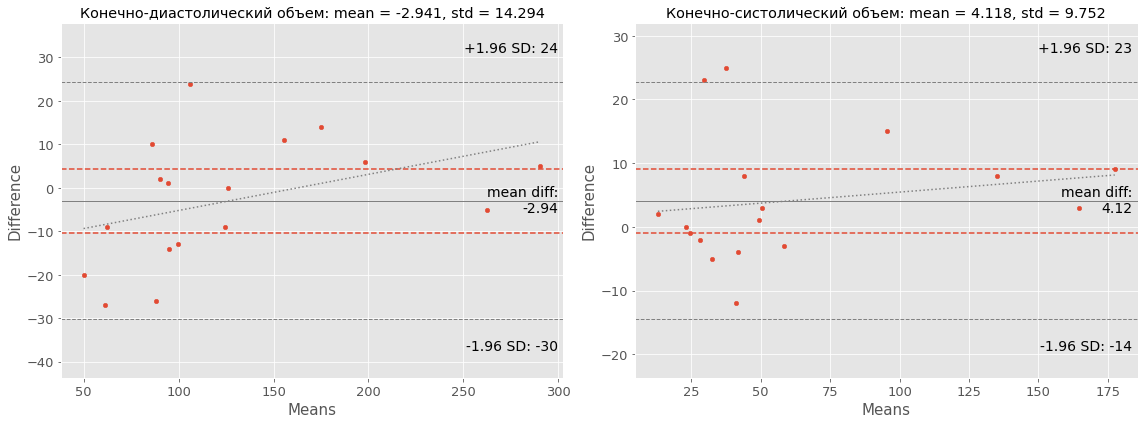

In [12]:
f, ax = plt.subplots(1, 2, figsize = (16, 6))

for i, method in enumerate(df.columns.levels[0]):
    diffs = df[(method, "Изотопная вентрикулография")] - df[(method, "Рентгеноконтрастная вентрикулография")]
    means = (df[(method, "Изотопная вентрикулография")] + df[(method, "Рентгеноконтрастная вентрикулография")])/2

    n, mean, std = diffs.agg(["count", "mean", "std"]).values.tolist()
    # print(f"{method}: mean = {mean:.3f}, std = {std:.3f}")
    sm.graphics.mean_diff_plot(df[(method, "Изотопная вентрикулография")], df[(method, "Рентгеноконтрастная вентрикулография")], ax = ax[i]);
    ax[i].set_title(f"{method}: mean = {mean:.3f}, std = {std:.3f}");

    # добавим moe чтоб видеть есть ли bias
    moe = scipy.stats.t.ppf(.975, df=n-1, scale=std/n**.5)
    ax[i].axhline(mean+moe, linestyle="--")
    ax[i].axhline(mean-moe, linestyle="--")

    # добавим линию регрессии
    reg = LinearRegression().fit(means.values.reshape(-1,1), 
                                 diffs.values)  # type: ignore
    a, b = reg.intercept_, reg.coef_[0]
    r, p = scipy.stats.pearsonr(x, y)
    xmin, xmax = means.min(), means.max()

    ax[i].plot([xmin, xmax], np.array([xmin, xmax])*b + a, linestyle=":", c="grey")
    print(f"{method}: a = {a:.2f}, b = {b:.2f}, r = {r:.2f}, p = {p:.3f}");

средняя разность и стандартное отклонение говорит о хорошей согласованности по обоим показателям. При графическом анализе видно, что в обоих случаях разность увеличивается с ростом среднего показателя.

**8.6.**

Азотистый баланс — разность между количеством азота, который попадает в организм с пищей, и количеством азота, выводимого из организма, — важный показатель полноценности питания. Отрицательный азотистый баланс свидетельствует о том, что организм не получает достаточно белка. Нормы суточного потребления белка, рекомендуемые Всемирной организацией здравоохранения и Японским комитетом питания, рассчитаны главным образом на мужчин. Целью исследования К. Канеко и Г. Койке (К. Kaneko, G. Koike. Utilization and requirement of egg protein in Japanese women. J. Nutr. Sci. Vitaminol. (Tokyo), 31:43—52, 1985) было определить количество белка в рационе, необходимое для поддержания нулевого азотистого баланса у японских женщин. Связь суточного потребления азота и азотистого баланса определили при калорийности суточного рациона 37 и 33 ккал/кг. Были получены следующие данные.

* Калорийность суточного рациона 37 ккал/кг:

Потребление азота, мг/кг|Азотистый баланс, мг/кг
-|-
49|–30
47|–22
50|–29
76|–22
77|–15
99|–10
98|–11
103|–10
118|–1
105|–4
100|–13
98|–14

* Калорийность суточного рациона 33 ккал/кг:

Потребление азота, мг/кг|Азотистый баланс, мг/кг
-|-
32|–32
32|–20
32|–17
51|–10
53|–20
51|–18
52|–21
74|4
72|–16
74|–14
98|6
97|–7

Найдите уравнения регрессии для обеих групп. Изобразите на одном рисунке результаты наблюдений и линии регрессии. Является ли различие межцу линиями регрессии статистически значимым? Для группы 37 ккал/кг найдите величину потребления азота, обеспечивающую нулевой азотистый баланс.

In [13]:
df = pd.DataFrame(data=[[49,-30,32,-32],[47,-22,32,-20],[50,-29,32,-17],[76,-22,51,-10],
                        [77,-15,53,-20],[99,-10,51,-18],[98,-11,52,-21],[103,-10,74,4],
                        [118,-1,72,-16],[105,-4,74,-14],[100,-13,98,6],[98,-14,97,-7]],
                  columns=pd.MultiIndex.from_tuples(product(["Калорийность суточного рациона 37 ккал/кг", "Калорийность суточного рациона 33 ккал/кг"],
                                                            ["Потребление азота, мг/кг","Азотистый баланс, мг/кг"]))
                  )

display(df)

Калорийность суточного рациона 37 ккал/кг                          \
                    Потребление азота, мг/кг Азотистый баланс, мг/кг   
0                                         49                     -30   
1                                         47                     -22   
2                                         50                     -29   
3                                         76                     -22   
4                                         77                     -15   
5                                         99                     -10   
6                                         98                     -11   
7                                        103                     -10   
8                                        118                      -1   
9                                        105                      -4   
10                                       100                     -13   
11                                        98                     -14   

   Калорийность суточного рациона 33 ккал/кг                          
                    Потребление азота, мг/кг Азотистый баланс, мг/кг  
0                                         32                     -32  
1                                         32                     -20  
2                                         32                     -17  
3                                         51                     -10  
4                                         53                     -20  
5                                         51                     -18  
6                                         52                     -21  
7                                         74                       4  
8                                         72                     -16  
9                                         74                     -14  
10                                        98                       6  
11                                        97                      -7

Калорийность суточного рациона 33 ккал/кг: a = -34.792, b = 0.352, r = 0.765, p = 0.004
Калорийность суточного рациона 37 ккал/кг: a = -44.290, b = 0.344, r = 0.933, p = 0.000


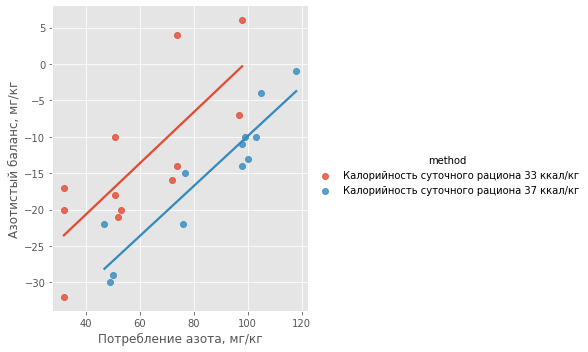

In [14]:
sns.lmplot(x="Потребление азота, мг/кг", 
           y="Азотистый баланс, мг/кг", 
           data=df.stack(0).reset_index().rename(columns={"level_1": "method"}), 
           hue="method",
           ci=None)

coefs = []  # параметры которые необходимо сохранить для сравнения линий регрессии

for i, method in enumerate(df.columns.levels[0]):
    x = df[(method, "Потребление азота, мг/кг")].values
    y = df[(method, "Азотистый баланс, мг/кг")].values
    n = len(df)
    
    reg = LinearRegression().fit(x.reshape(-1,1), y)  # type: ignore
    a, b = reg.intercept_, reg.coef_[0]
    r, p = scipy.stats.pearsonr(x, y)

    Sx, Sy = x.std(ddof=1), y.std(ddof=1)
    Syx = ((n-1)/(n-2)*(Sy**2 - b**2 * Sx**2))**.5  # остаточное стандартное отклонение
    Sa = Syx*(1/n + x.mean()**2/(n-1)/Sx**2)**.5
    Sb = Syx/(n-1)**.5/Sx

    coefs.append((Sa, Sb, a, b))  # можно было замарочиться с именнованным кортежом
    
    print(f"{method}: a = {a:.3f}, b = {b:.3f}, r = {r:.3f}, p = {p:.3f}");

In [15]:
Sa1, Sb1, a1, b1 = coefs[0]
Sa2, Sb2, a2, b2 = coefs[1]

tb = abs(b1-b2)/(Sb1**2+Sb2**2)**.5
ta = abs(a1-a2)/(Sa1**2+Sa2**2)**.5
t05 = scipy.stats.t.ppf(.975, df=20)
pa = scipy.stats.t.pdf(ta, df=20)
pb = scipy.stats.t.pdf(tb, df=20)

print(f"t05 = {t05}")
print(f"Для коэффициента сдвига: ta={ta:.3f}, pa={pa:.3f}")
print(f"Для коэффициента наклона: tb={tb:.3f}, pb={pb:.3f}")

t05 = 2.0859634472658364
Для коэффициента сдвига: ta=1.351, pa=0.158
Для коэффициента наклона: tb=0.079, pb=0.393


Для обоих коэффициентов различия статистически не значимы.

При калорийности 37 ккал/кг нулевой азотистый баланс достигается при поступлении азота 128 мг/кг (легко найти по формуле x = -a/b).


**8.7.**

В. Ернайчик (W. Jernajczyk. Latency of eye movement and other REM sleep parameters in bipolar depression. Biol. Psychiatry, 21:465—472, 1986), изучая физиологию сна при депрессии, столкнулся с необходимостью оценки тяжести этого заболевания. Шкала депрессии Бека основана на опроснике, заполняемом самим больным. Она проста в применении, однако специфичность ее недостаточна. Применение шкалы депрессии Гамильтона более сложно, поскольку требует участия врача, но именно эта шкала дает наиболее точные результаты. Тем не менее автор был склонен использовать шкалу Бека. В самом деле, если ее специфичность недостаточна для диагностики, то это еще не говорит о том, что ее нельзя использовать для оценки тяжести депрессии у больных с уже установленным диагнозом. Сравнив оценки по обеим шкалам у 10 больных, В. Ернайчик получил следующие результаты.

Оценка по шкале депрессии Бека|Оценка по шкале депрессии Гамильтона
-|-
20|22
11|14
13|10
22|17
37|31
27|22
14|12
20|19
37|29
20|15

Насколько согласованы оценки?

In [16]:
df = pd.DataFrame(data=[[20, 22], [11, 14], [13, 10], [22, 17], [37, 31], [27, 22], [14, 12], [20, 19], [37, 29], [20, 15]],
                  columns=["Оценка по шкале депрессии Бека", "Оценка по шкале депрессии Гамильтона"])

display(df)

,Оценка по шкале депрессии Бека,Оценка по шкале депрессии Гамильтона
0,20,22
1,11,14
2,13,10
3,22,17
4,37,31
5,27,22
6,14,12
7,20,19
8,37,29
9,20,15


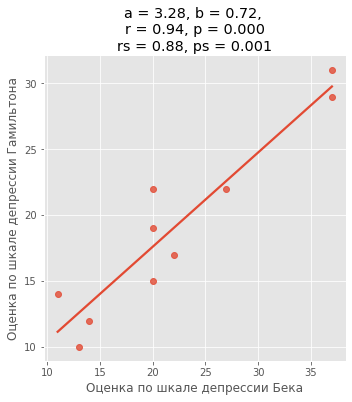

In [17]:
sns.lmplot(x="Оценка по шкале депрессии Бека", y="Оценка по шкале депрессии Гамильтона", data=df, ci=None);
ax = plt.gca()

x = df["Оценка по шкале депрессии Бека"].values
y = df["Оценка по шкале депрессии Гамильтона"].values

reg = LinearRegression().fit(x.reshape(-1,1), y)  # type: ignore
a, b = reg.intercept_, reg.coef_[0]
r, p = scipy.stats.pearsonr(x, y)
rs, ps = scipy.stats.spearmanr(x, y)

ax.set_title(f"a = {a:.2f}, b = {b:.2f}, \nr = {r:.2f}, p = {p:.3f}\nrs = {rs:.2f}, ps = {ps:.3f}");

Оценки согласованы достаточно хорошо. В данной задаче можно применять как корреляцию Спирмана, так и корреляцию Пирсона.

**8.8.**

Полоскание с хлоргексидином предотвращает образование зубного налета, но имеет вкус, который трудно назвать приятным, кроме того, оно окрашивает зубы. Полоскание на основе хлорида аммония приятнее на вкус, не окрашивает зубы; считается, однако, что оно менее эффективно. Ф. Эшли и соавт. (F. P. Ashley et al. Effect of a 0,1% cetylpyridinium chloride mouthrinse on the accumulation and biochemical composition of dental plaque in young adults. Caries Res., 18:465—471, 1984) сравнили эффективность двух видов полоскания. Участники исследования полоскали рот одним из растворов, после чего зубной налет отделяли и взвешивали. Опыт проводился 48 часов: за меньший срок налет не успевал накопиться в количестве, достаточном для точного взвешивания. Исследователей больше интересовало образование налета за 24 часа, поэтому в середине опыта налет оценивали визуально по специально разработанной шкале. Чтобы оценить точность визуальных оценок, их проводили и на 48-м часу и сравнивали с результатами взвешивания. Результаты сопоставления двух способов оценки зубного налета представлены в таблице:

Визуальная оценка зубного налета, баллы|Сухой вес зубного налета, мг
-|-
25|2.7
32|1.2
45|2.7
60|2.1
60|3.5
65|2.8
65|3.7
78|8.9
80|5.8
83|4.0
100|5.1
110|5.1
120|4.8
125|5.8
140|11.7
143|8.5
143|11.1
145|7.1
148|14.2
153|12.2

Насколько, судя по этим данным, можно полагаться на визуальный способ оценки?

In [18]:
df = pd.DataFrame(data=[[25,2.7], [32,1.2], [45,2.7], [60,2.1], [60,3.5], 
                        [65,2.8], [65,3.7], [78,8.9], [80,5.8], [83,4.0], 
                        [100,5.1], [110,5.1], [120,4.8], [125,5.8], [140,11.7], 
                        [143,8.5], [143,11.1], [145,7.1], [148,14.2], [153,12.2]],
                  columns=["Визуальная оценка зубного налета, баллы", "Сухой вес зубного налета, мг"])

display(df)

,"Визуальная оценка зубного налета, баллы","Сухой вес зубного налета, мг"
0,25,2.7
1,32,1.2
2,45,2.7
3,60,2.1
4,60,3.5
5,65,2.8
6,65,3.7
7,78,8.9
8,80,5.8
9,83,4.0


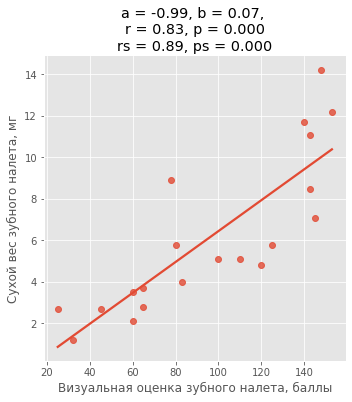

In [19]:
sns.lmplot(x="Визуальная оценка зубного налета, баллы", y="Сухой вес зубного налета, мг", data=df, ci=None);
ax = plt.gca()

x = df["Визуальная оценка зубного налета, баллы"].values
y = df["Сухой вес зубного налета, мг"].values

reg = LinearRegression().fit(x.reshape(-1,1), y)  # type: ignore
a, b = reg.intercept_, reg.coef_[0]
r, p = scipy.stats.pearsonr(x, y)
rs, ps = scipy.stats.spearmanr(x, y)

ax.set_title(f"a = {a:.2f}, b = {b:.2f}, \nr = {r:.2f}, p = {p:.3f}\nrs = {rs:.2f}, ps = {ps:.3f}");

Визуальная оценка достаточно хорошо соответствует результатам взвешивания. Однако, на графике легко заметить, что возможно имеет место нелинейная связь между результатами измерений и визуальной оценкой (при большом налете визуальная оценка занижает результат).

**Прямое применение метода Блэнда—Алтмана в данном случае не возможно (!!!)** из-за того, что сравниваемые методы измерения имеют различные шкалы (между ними нет прямой конвертации). 

*Применение z стандартизация (для обезразмеривания) исключает возможность определения наличия смещения, но возможно позволит обратить внимание на нелинейность связи между сравниваемыми методами.*

*В данном случае, чтоб визуально показать нелинейность связи, разницы в выборе между StandardScaler и MinMaxScaler нет.*

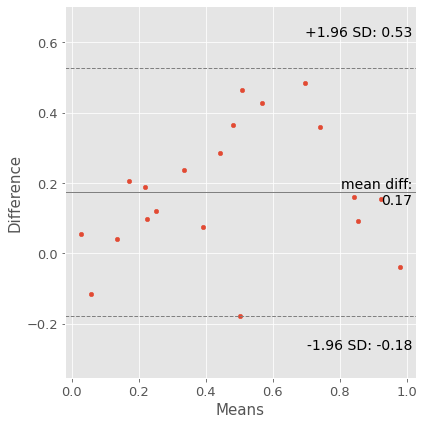

In [20]:
x = MinMaxScaler().fit_transform(df["Визуальная оценка зубного налета, баллы"].values.reshape(-1,1)).flatten()
y = MinMaxScaler().fit_transform(df["Сухой вес зубного налета, мг"].values.reshape(-1,1)).flatten()

f, ax = plt.subplots(1, 1, figsize = (6, 6))

sm.graphics.mean_diff_plot(x, y, ax = ax);

**8.9.**

Нормальный эритроцит легко меняет форму и проходит через мельчайшие сосуды. При генетическом дефекте β-цепи гемоглобин полимеризуется, в результате форма части эритроцитов меняется, они становятся ригидными, закупоривают сосуды и разрушаются. Такова в сильно упрощенном виде сущность серповидноклеточной анемии — тяжелого заболевания с многообразными проявлениями. Наиболее мучительны болевые кризы. Они развиваются, когда под влиянием гипоксии происходит массовая полимеризация гемоглобина, деформация эритроцитов и закупорка сосудов. Существует предположение, что дело не только в деформации и ригидности эритроцитов — определенную роль играет также повышенная склонность эритроцитов к адгезии — прилипанию к эндотелию (внутренней выстилке сосудов). Р. Хебелл и соавт. (R. Hebbel et al. Erythrocyte adherence to endothelium in sickle-cell anemia: a possible determinant of disease severity. N. Engl. J. Med., 302:992—995, 1980) решили выяснить, есть ли связь между тяжестью заболевания и адгезивностью эритроцитов. Прежде всего необходимо было
разработать способы оценки этих признаков. 

Для оценки тяжести серповидноклеточной анемии была построена специальная шкала.

* Ежегодное число болевых кризов, требующих госпитализации или применения наркотических анальгетиков:
    * 1-5 - 1 балл
    * 6-10 - 2 балла
    * 10+ - 3 балла
* Язвы на коже - 2 балла
* Поражение сетчатки - 1 балл
* Поражение ЦНС (судороги, инсульт) - 2 балла
* Поражение костей (инфаркты, асептический некроз) - 2 балла    

Баллы за отдельные признаки суммировали, таким образом казедый больной получал от 0 до 13 баллов и более (по 2 балла дается за каждый инфаркт или асептический некроз кости). Для оценки адгезивности эритроцитов известное их количество наносили на культуру эндотелия, инкубировали и затем смывали. Подсчитав число смытых эритроцитов, определяли число прилипших. Одновременно такой же опыт делали с нормальными эритроцитами. Результат выражали в виде коэффициента адгезии: отношения числа прилипших эритроцитов больного к числу прилипших эритроцитов здорового. Было обследовано 20 больных. У каждого оценили тяжесть заболевания и коэффициент адгезии. Подтверждают ли эти дан ные гипотезу о связи между адгезивностью эритроцитов и тяжестью серповидноклеточной анемии?

Тяжесть заболевания, баллы|Коэффициент адгезии
-|-
0|1.0
0|1.4
1|1.0
1|1.0
1|1.9
1|2.0
1|2.5
1|3.0
2|2.0
2|3.2
3|3.0
3|3.2
3|6.3
4|2.7
5|3.0
5|5.0
5|17.0
6|5.2
9|19.8
11|25.0

In [21]:
df = pd.DataFrame(data=[[0, 1.0], [0, 1.4], [1, 1.0], [1, 1.0], [1, 1.9], 
                        [1, 2.0], [1, 2.5], [1, 3.0], [2, 2.0], [2, 3.2], 
                        [3, 3.0], [3, 3.2], [3, 6.3], [4, 2.7], [5, 3.0], 
                        [5, 5.0], [5, 17.0], [6, 5.2], [9, 19.8], [11, 25.0]],
                  columns=["Тяжесть заболевания, баллы", "Коэффициент адгезии"])

display(df)

,"Тяжесть заболевания, баллы",Коэффициент адгезии
0,0,1.0
1,0,1.4
2,1,1.0
3,1,1.0
4,1,1.9
5,1,2.0
6,1,2.5
7,1,3.0
8,2,2.0
9,2,3.2


In [22]:
rs, ps = scipy.stats.spearmanr(df["Тяжесть заболевания, баллы"], df["Коэффициент адгезии"])

print(f"rs = {rs:.3f}, P = {ps:.3f}")

rs = 0.861, P = 0.000


Данные подтверждают гипотезу о связи между адгезивностью эритроцитов и тяжестью серповидноклеточной анемии.

**8.10.**

Какова вероятность выявить коэффициент корреляции не меньше 0.6 при объеме выборки 39 и уровне значимости 5%?

In [23]:
ro = 0.6
n = 39
alpha = 0.05

Zp = np.log((1 + ro)/(1 - ro)) / 2
sgmz = 1 / (n - 3)**.5

p = 1 - scipy.stats.norm.cdf(scipy.stats.norm.ppf(1.-alpha/2) - Zp/sgmz)

print(f"P = {p:.3f}")

P = 0.986


**8.11.**

Каков должен быть объем выборки, чтобы с вероятностью 80% выявить коэффициент корреляции не меньше 0,6 при уровне значимости 5%.

In [24]:
ro = 0.6
p = 0.8
alpha = 0.05

Zp = np.log((1 + ro) / (1 - ro)) / 2

n = ((scipy.stats.norm.ppf(1.-alpha/2) - scipy.stats.norm.ppf(1-p))/Zp)**2 + 3
print(f"n = {n}")

n = 19.33641481471773


N = 20

**8.12.**

Ожирение предрасполагает к развитию инсулинонезависимого сахарного диабета. При этом играет роль тип ожирения: наиболее опасным считается так называемое ожирение по мужскому типу, когда жир откладывается преимущественно на туловище (при ожирении по женскому типу жир откладывается главным образом на бедрах и ягодицах). Однако далеко не у всех людей с ожирением по мужскому типу развивается инсулине независимый сахарный диабет. Необходимо действие дополнительного фактора, предположительно генетического. Т. Эндр и соавт. (Т. Endre et al. Insulin resistance is coupled to low physical fitness in normotensive men with a family history of hypertension. J. Hypertension, 12:81—88, 1994) исследовали связь чувствительности к инсулину (ее снижение лежит в основе инсулинонезависимого сахарного диабета) и отношения объема талии к объему бедра (показатель типа ожирения). Индекс чувствительности к инсулину рассчитывали как логарифм снижения уровня глюкозы плазмы после введения инсулина. В исследование вошло 15 мужчин, у которых не было родственников первой степени с артериальной гипертонией (1 -я группа) и 15 мужчин, у которых такие родственники были (2-я группа).

* 1-я группа

Отношение объема талии к объему бедра|Индекс чувствительности к инсулину
-|-
0.775|1.322
0.800|1.301
0.810|1.130
0.800|0.929
0.850|1.021
0.860|1.000
0.925|1.106
0.900|0.954
0.925|0.813
0.945|1.041
0.945|1.021
0.950|0.978
0.975|0.740
1.050|0.778
1.075|0.574


* 2-я группа

Отношение объема талии к объему бедра|Индекс чувствительности к инсулину
-|-
0.800|1.000
0.810|0.699
0.850|0.978
0.875|0.398
0.850|0.602
0.870|0.760
0.910|0.989
0.925|0.903
0.925|0.778
0.940|0.628
0.945|0.929
0.960|0.954
1.100|0.929
1.100|0.653
0.990|0.352

Одинакова ли связь показателей в обеих группах?

In [25]:
df = pd.DataFrame(data=[[0.775, 1.322, 0.800, 1.000], [0.800, 1.301, 0.810, 0.699], [0.810, 1.130, 0.850, 0.978], 
                        [0.800, 0.929, 0.875, 0.398], [0.850, 1.021, 0.850, 0.602], [0.860, 1.000, 0.870, 0.760], 
                        [0.925, 1.106, 0.910, 0.989], [0.900, 0.954, 0.925, 0.903], [0.925, 0.813, 0.925, 0.778], 
                        [0.945, 1.041, 0.940, 0.628], [0.945, 1.021, 0.945, 0.929], [0.950, 0.978, 0.960, 0.954], 
                        [0.975, 0.740, 1.100, 0.929], [1.050, 0.778, 1.100, 0.653], [1.075, 0.574, 0.990, 0.352]],
                  columns=pd.MultiIndex.from_tuples(product(["1-я группа", "2-я группа"], ["Отношение объема талии к объему бедра", "Индекс чувствительности к инсулину"])))

display(df)

1-я группа                                     \
   Отношение объема талии к объему бедра Индекс чувствительности к инсулину   
0                                  0.775                              1.322   
1                                  0.800                              1.301   
2                                  0.810                              1.130   
3                                  0.800                              0.929   
4                                  0.850                              1.021   
5                                  0.860                              1.000   
6                                  0.925                              1.106   
7                                  0.900                              0.954   
8                                  0.925                              0.813   
9                                  0.945                              1.041   
10                                 0.945                              1.021   
11                                 0.950                              0.978   
12                                 0.975                              0.740   
13                                 1.050                              0.778   
14                                 1.075                              0.574   

                              2-я группа                                     
   Отношение объема талии к объему бедра Индекс чувствительности к инсулину  
0                                  0.800                              1.000  
1                                  0.810                              0.699  
2                                  0.850                              0.978  
3                                  0.875                              0.398  
4                                  0.850                              0.602  
5                                  0.870                              0.760  
6                                  0.910                              0.989  
7                                  0.925                              0.903  
8                                  0.925                              0.778  
9                                  0.940                              0.628  
10                                 0.945                              0.929  
11                                 0.960                              0.954  
12                                 1.100                              0.929  
13                                 1.100                              0.653  
14                                 0.990                              0.352

1-я группа: a = 2.587, b = -1.774, r = -0.800, p = 0.000
2-я группа: a = 0.934, b = -0.177, r = -0.075, p = 0.790
Объединенная группа: a = 1.872, b = -1.090, r = -0.423, p = 0.020


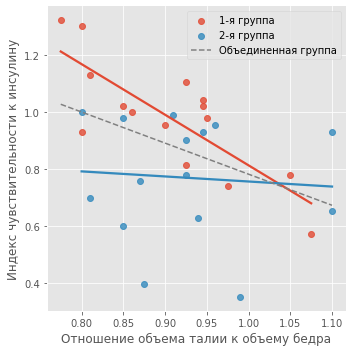

In [26]:
sns.lmplot(x="Отношение объема талии к объему бедра", 
           y="Индекс чувствительности к инсулину", 
           data=df.stack(0).reset_index().rename(columns={"level_1": "группа"}), 
           hue="группа",
           ci=None,
           facet_kws={'legend_out': False})

coefs = []  # параметры которые необходимо сохранить для сравнения линий регрессии

for i, method in enumerate(df.columns.levels[0]):
    x = df[(method, "Отношение объема талии к объему бедра")].values
    y = df[(method, "Индекс чувствительности к инсулину")].values
    n = len(df)
    
    reg = LinearRegression().fit(x.reshape(-1,1), y)  # type: ignore
    a, b = reg.intercept_, reg.coef_[0]
    r, p = scipy.stats.pearsonr(x, y)

    Sx, Sy = x.std(ddof=1), y.std(ddof=1)
    Syx = ((n-1)/(n-2)*(Sy**2 - b**2 * Sx**2))**.5  # остаточное стандартное отклонение
    Sa = Syx*(1/n + x.mean()**2/(n-1)/Sx**2)**.5
    Sb = Syx/(n-1)**.5/Sx

    coefs.append((Syx, Sa, Sb, a, b))  # можно было замарочиться с именнованным кортежом
    
    print(f"{method}: a = {a:.3f}, b = {b:.3f}, r = {r:.3f}, p = {p:.3f}");

# Объединение выборок
x = np.concatenate([df.iloc[:, 0].values, df.iloc[:,2].values])
y = np.concatenate([df.iloc[:, 1].values, df.iloc[:,3].values])
reg = LinearRegression().fit(x.reshape(-1,1), y)
a0, b0 = reg.intercept_, reg.coef_[0]
r0, p0 = scipy.stats.pearsonr(x, y)
Sx0, Sy0 = x.std(ddof=1), y.std(ddof=1)
n0 = len(x)

xmin, xmax = x.min(), x.max()
plt.gca().plot([xmin, xmax], np.array([xmin, xmax])*b0 + a0, linestyle="--", c="grey", label="Объединенная группа")
plt.gca().legend()
print(f"Объединенная группа: a = {a0:.3f}, b = {b0:.3f}, r = {r0:.3f}, p = {p0:.3f}")

In [27]:
Syx1, Sa1, Sb1, a1, b1 = coefs[0]
Syx2, Sa2, Sb2, a2, b2 = coefs[1]

tb = abs(b1-b2)/(Sb1**2+Sb2**2)**.5
ta = abs(a1-a2)/(Sa1**2+Sa2**2)**.5
t05 = scipy.stats.t.ppf(.975, df=20)
pa = scipy.stats.t.pdf(ta, df=20)
pb = scipy.stats.t.pdf(tb, df=20)

# print(f"t05 = {t05}")
print(f"1) Для коэффициента сдвига: ta={ta:.3f}, pa={pa:.3f}")
print(f"2) Для коэффициента наклона: tb={tb:.3f}, pb={pb:.3f}")

Syx_ = ((Syx1**2 + Syx2**2)/2)**.5
Syx0 = ((n0-1)/(n0-2)*(Sy0**2 - b0**2 * Sx0**2))**.5

F = ((n0-2)*Syx0**2 - (n0-4)*Syx_**2)/2/Syx_**2
p = 1-scipy.stats.f.cdf(F, 2, n0-4)

print(f"3) При сравнении линий регрессии в целом: F={F:.3f}, p={p:.3f}")

1) Для коэффициента сдвига: ta=2.393, pa=0.028
2) Для коэффициента наклона: tb=2.134, pb=0.046
3) При сравнении линий регрессии в целом: F=6.643, p=0.005


Различия линий регрессии статистически значимы